# 环境导入

In [1]:
import sys

package_root = r"F:\wangpeng\code\transmon-qubit"
sys.path.insert(0, package_root)
sys.executable
%load_ext autoreload
%autoreload 2

['F:\\wangpeng\\code\\transmon-qubit', 'F:\\wangpeng\\code\\jupyter\\transmon-qubit\\芯片参数设计', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\python310.zip', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\DLLs', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\lib', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit', '', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\lib\\site-packages', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\lib\\site-packages\\win32', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\lib\\site-packages\\win32\\lib', 'C:\\Users\\QuanmtumYangxx\\anaconda3\\envs\\transmon-qubit\\lib\\site-packages\\Pythonwin']


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import qutip as qp
import matplotlib as mpl
import scipy
from sklearn.metrics import mean_squared_error
import copy
from chip_hamiltonian.chip_hamiltonian import Chip, ChipDynamic
from solvers.solvers import Solver, SolverDynamic
from experiment import *
from pulse.pulse_lib import *
from functions.plot_tools import PlotTool
from functions.fit_tools import fit_fft
from functions import *
from functions.tools import *
from scipy.optimize import *
from itertools import product

%matplotlib notebook
np.set_printoptions(threshold=np.inf, precision=4, suppress=True)

yaml_path = r'chip_param_2q.yaml'

ploter = PlotTool(figsize=(8, 5), cmap='gist_rainbow', flag_save=True)

# ZZ随coupler频率变化

## 初始化芯片

In [40]:
chip_solver = Solver(chip_path=yaml_path, dim=3, num_cpus=12)

num_cpus: 12


In [12]:
# w_off, zz_off = chip_solver.ZZ_min((5,8), 'Q1', 'Q2', save_flag=True)

1


In [6]:
True*0.1111

0.1111

## zz随coupler频率变化

In [32]:
chip_solver.ZZcoupling_parallel(q_dict_exp_list[-1],'Q1', 'Q2')

-0.023342887085056496

In [37]:
chip_solver.chip_dic

{'qubits': {'Q1': {'w_idle': 4.102,
   'eta': -0.315,
   'id': 0,
   'w_idle~': 4.104388207418376,
   'w_max': 4.6,
   'period': 1.0,
   'sws': 0.0,
   'd': 0.25,
   'w': 4.102},
  'C1_2': {'w_idle': 3.12,
   'eta': -0.25,
   'id': 1,
   'w_idle~': 3.10910629890526,
   'w_max': 7.0,
   'period': 1.0,
   'sws': 0.0,
   'd': 0.25,
   'w': 3.12},
  'Q2': {'w_idle': 3.892,
   'eta': -0.217,
   'id': 2,
   'w_idle~': 3.894999697592919,
   'w_max': 5.0,
   'period': 1.0,
   'sws': 0.0,
   'd': 0.25,
   'w': 3.892}},
 'rho_map': {'Q1-C1_2': -0.01736, 'Q2-C1_2': 0.01736, 'Q1-Q2': 0.002144}}

In [14]:
w_c_list = np.linspace(3.4, 3.6, 201)
q_dict_exp_list = [{'C1_2': {'w_idle': w_c}} for w_c in w_c_list]

zz_list_ori = qp.parallel_map(chip_solver.ZZcoupling,
                              q_dict_exp_list,
                              task_kwargs={
                                  'qubit0': 'Q1',
                                  'qubit1': 'Q2',
                                  'coupler_freq': -1,
                                  'parallel_args': ['q_dict_exp']
                              },
                              progress_bar=True,
                              num_cpus=chip_solver.num_cpus)

10.4%. Run time:   3.22s. Est. time left: 00:00:00:27
20.4%. Run time:   3.29s. Est. time left: 00:00:00:12
30.3%. Run time:   3.37s. Est. time left: 00:00:00:07
40.3%. Run time:   3.45s. Est. time left: 00:00:00:05
50.2%. Run time:   3.52s. Est. time left: 00:00:00:03
60.2%. Run time:   3.61s. Est. time left: 00:00:00:02
70.1%. Run time:   3.75s. Est. time left: 00:00:00:01
80.1%. Run time:   3.85s. Est. time left: 00:00:00:00
90.0%. Run time:   3.92s. Est. time left: 00:00:00:00
100.0%. Run time:   3.98s. Est. time left: 00:00:00:00
Total run time:   4.07s


In [15]:
zz_list_ori

[0.0011312833958658786,
 0.0011099083523884445,
 0.0010884621556677132,
 0.0010669447920470532,
 0.001045356280664933,
 0.0010236966775982737,
 0.0010019660806959152,
 0.0009801646348659432,
 0.0009582925383906371,
 0.0009363500501855526,
 0.0009143374979050378,
 0.0008922552878898315,
 0.0008701039163119262,
 0.0008478839824066497,
 0.0008255962041108234,
 0.0008032414362988405,
 0.0007808206928086037,
 0.0007583351721152098,
 0.0007357862887484856,
 0.0007131757106355607,
 0.0006905054045835968,
 0.0006677776917873857,
 0.0006449953156932864,
 0.0006221615259525137,
 0.0005992801831169459,
 0.0005763558895557352,
 0.0005533941554807242,
 0.0005304016102689602,
 0.0005073862754843006,
 0.00048435791949241747,
 0.0004613285251222621,
 0.00043831291160056907,
 0.00041532957459455844,
 0.00039240183460265143,
 0.0003695594309585104,
 0.000346840769048562,
 0.0003242961404765765,
 0.0003019924174108013,
 0.0002800200122115015,
 0.0002585033639830314,
 0.00023761694485280316,
 0.0002176098

<IPython.core.display.Javascript object>


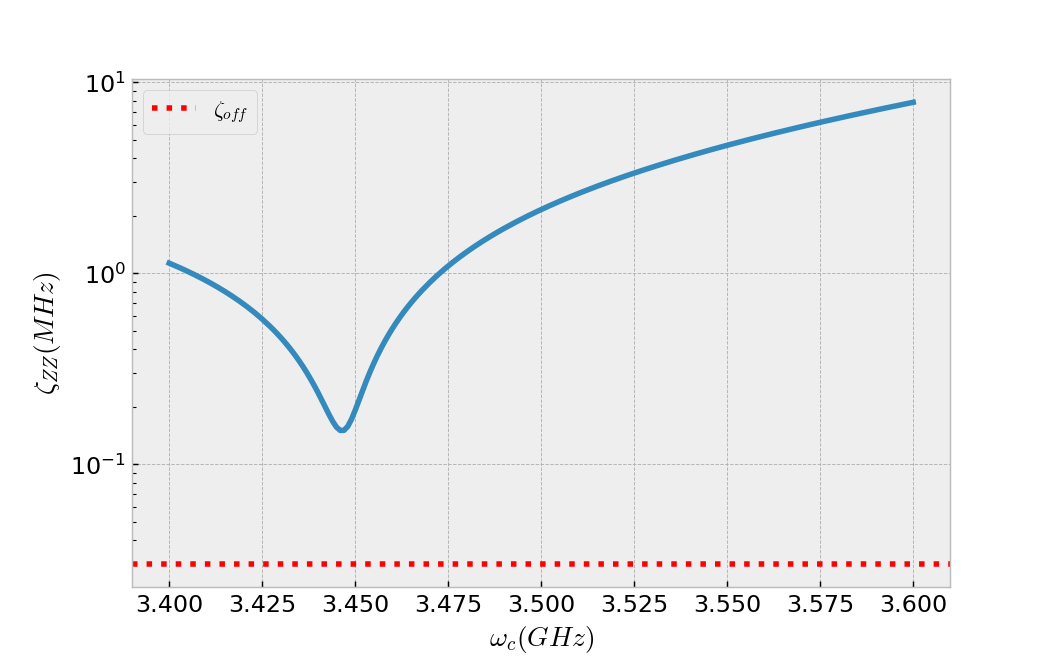

In [16]:
zz_off = 0.03
zz_list = [zz * 1e3 for zz in zz_list_ori]
fig, ax = plt.subplots()
ax.set_xlabel(r'$\omega_{c} (GHz)$')
ax.set_ylabel(r'$\zeta_{ZZ}(MHz)$')
ax.set_yscale('log')
ax.plot(w_c_list,zz_list)
ax.axhline(zz_off, linestyle=':', color='red', label='$\zeta_{off}$')    
ax.legend()

In [15]:
fig, ax = plt.subplots()
    ax.set_xlabel(r'$\omega_{c} (GHz)$')
    ax.set_ylabel(r'$\omega_{q} (GHz)$')
    ax.set_title(f'Spectator Qubit Freq = {w3_idle} GHz')
    norm = mpl.colors.LogNorm()

    c = ax.pcolormesh(X, Y, error_arr, norm=norm)
    cb = plt.colorbar(c, ax=ax)
    cb.set_label(r'$error$')

    CS = ax.contour(X, Y, error_arr, [1e-3],norm=norm, colors='red')

512

## ZZ与比特非谐的关系

In [29]:
w_c_list = np.linspace(5, 9, 201)
alpha_q_list = np.linspace(-0.2, -0.35, 151)
q_dict_exp_list = [{
    'C1_2': {
        'w_idle': w_c
    },
    'Q1': {
        'eta': alpha_q
    },
    'Q2': {
        'eta': alpha_q
    }
} for alpha_q in alpha_q_list for w_c in w_c_list]
zz_list_ori = qp.parallel_map(chip_solver.ZZcoupling_parallel,
                              q_dict_exp_list,
                              task_kwargs={
                                  'qubit0': 'Q1',
                                  'qubit1': 'Q2',
                              },
                              progress_bar=True,
                              num_cpus=chip_solver.num_cpus)

10.0%. Run time:   4.92s. Est. time left: 00:00:00:44
20.0%. Run time:   9.04s. Est. time left: 00:00:00:36
30.0%. Run time:  13.12s. Est. time left: 00:00:00:30
40.0%. Run time:  17.17s. Est. time left: 00:00:00:25
50.0%. Run time:  21.20s. Est. time left: 00:00:00:21
60.0%. Run time:  25.24s. Est. time left: 00:00:00:16
70.0%. Run time:  29.28s. Est. time left: 00:00:00:12
80.0%. Run time:  33.37s. Est. time left: 00:00:00:08
90.0%. Run time:  37.45s. Est. time left: 00:00:00:04
100.0%. Run time:  41.49s. Est. time left: 00:00:00:00
Total run time:  41.56s


<IPython.core.display.Javascript object>


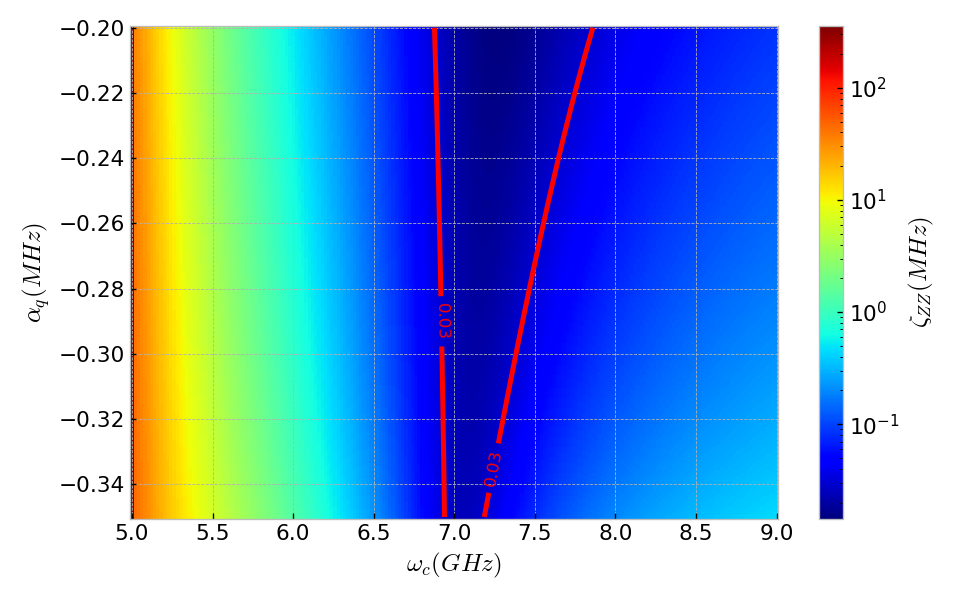

fig path: /home/wangpeng/Simulation jupyter/transmon-qubit/physical paras design/figures/2023-08/0803-19.54.08_比特非谐对ZZ关断点的影响.png


In [36]:
X, Y = np.meshgrid(w_c_list, alpha_q_list)
zz_arr = (np.array(zz_list_ori)*1e3).reshape(len(alpha_q_list), len(w_c_list))

fig, ax = plt.subplots()
ax.set_xlabel(r'$\omega_{c} (GHz)$')
ax.set_ylabel(r'$\alpha_{q} (MHz)$')
norm = mpl.colors.LogNorm()
c = ax.pcolormesh(X, Y, zz_arr, norm=norm)
cb = plt.colorbar(c, ax=ax)
cb.set_label(r'$\zeta_{ZZ}(MHz)$')
CS = ax.contour(X, Y, zz_arr, [0.03],norm=norm, colors='red')
ax.clabel(CS, inline=True, fontsize=10)


fig.tight_layout()
title = fr'比特非谐对ZZ关断点的影响'
ploter.save_fig(fig, title)

## ZZ与比特频率的关系(固定失谐)

In [37]:
w_c_list = np.linspace(5, 9, 201)
w1_q_list = np.linspace(4.5, 5.5, 101)
q_dict_exp_list = [{
    'C1_2': {
        'w_idle': w_c
    },
    'Q1': {
        'w_idle': w1_q
    },
    'Q2': {
        'w_idle': w1_q + 0.4
    }
} for w1_q in w1_q_list for w_c in w_c_list]
zz_list_ori = qp.parallel_map(chip_solver.ZZcoupling_parallel,
                              q_dict_exp_list,
                              task_kwargs={
                                  'qubit0': 'Q1',
                                  'qubit1': 'Q2',
                              },
                              progress_bar=True,
                              num_cpus=chip_solver.num_cpus)

10.0%. Run time:   3.58s. Est. time left: 00:00:00:32
20.0%. Run time:   6.30s. Est. time left: 00:00:00:25
30.0%. Run time:   9.06s. Est. time left: 00:00:00:21
40.0%. Run time:  11.80s. Est. time left: 00:00:00:17
50.0%. Run time:  14.52s. Est. time left: 00:00:00:14
60.0%. Run time:  17.29s. Est. time left: 00:00:00:11
70.0%. Run time:  20.00s. Est. time left: 00:00:00:08
80.0%. Run time:  22.71s. Est. time left: 00:00:00:05
90.0%. Run time:  25.41s. Est. time left: 00:00:00:02
100.0%. Run time:  28.13s. Est. time left: 00:00:00:00
Total run time:  28.20s


<IPython.core.display.Javascript object>


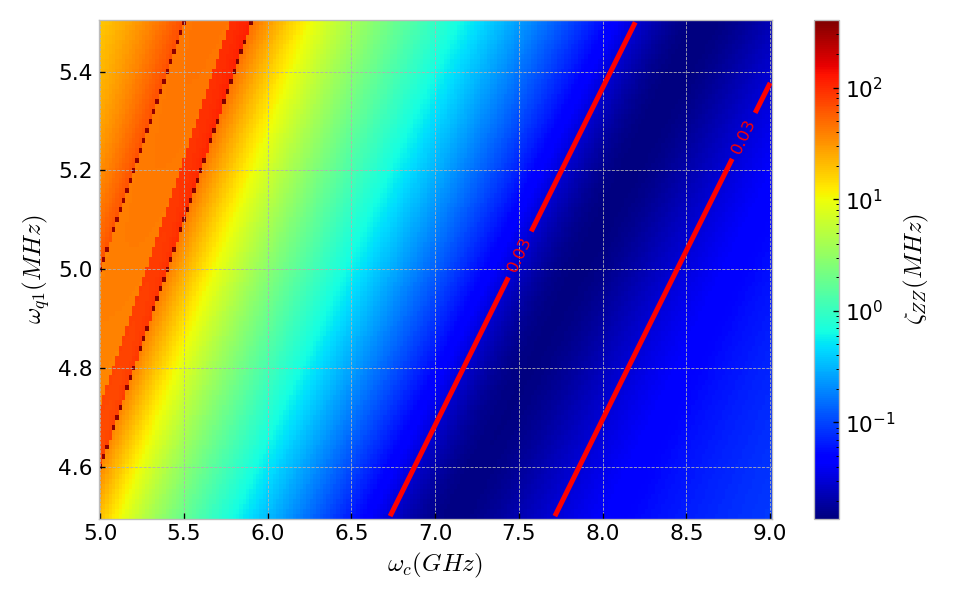

fig path: /home/wangpeng/Simulation jupyter/transmon-qubit/physical paras design/figures/2023-08/0803-20.42.49_比特频率对ZZ关断点的影响.png


In [39]:
X, Y = np.meshgrid(w_c_list, w1_q_list)
zz_arr = (np.array(zz_list_ori)*1e3).reshape(len(w1_q_list), len(w_c_list))

fig, ax = plt.subplots()
ax.set_xlabel(r'$\omega_{c} (GHz)$')
ax.set_ylabel(r'$\omega_{q1} (MHz)$')
norm = mpl.colors.LogNorm()
c = ax.pcolormesh(X, Y, zz_arr, norm=norm)
cb = plt.colorbar(c, ax=ax)
cb.set_label(r'$\zeta_{ZZ}(MHz)$')
CS = ax.contour(X, Y, zz_arr, [0.03],norm=norm, colors='red')
ax.clabel(CS, inline=True, fontsize=10)


fig.tight_layout()
title = fr'比特频率对ZZ关断点的影响'
ploter.save_fig(fig, title)

## ZZ与比特失谐的关系

In [41]:
w_c_list = np.linspace(2.5, 4, 101)
w1_list = np.linspace(4.092, 4.122, 31)
q_dict_exp_list = [{
    'C1_2': {
        'w_idle': w_c
    },
    'Q1': {
        'w_idle': w1
    },
} for w1 in w1_list for w_c in w_c_list]
zz_list_ori = qp.parallel_map(chip_solver.ZZcoupling,
                              q_dict_exp_list,
                              task_kwargs={
                              'qubit0': 'Q1',
                              'qubit1': 'Q2',
                              'coupler_freq': -1,
                              'parallel_args': ['q_dict_exp']
                              },
                              progress_bar=True,
                              num_cpus=chip_solver.num_cpus)

10.0%. Run time:   4.91s. Est. time left: 00:00:00:44
20.0%. Run time:   6.02s. Est. time left: 00:00:00:24
30.0%. Run time:   7.15s. Est. time left: 00:00:00:16
40.0%. Run time:   8.27s. Est. time left: 00:00:00:12
50.0%. Run time:   9.44s. Est. time left: 00:00:00:09
60.0%. Run time:  10.53s. Est. time left: 00:00:00:07
70.0%. Run time:  11.63s. Est. time left: 00:00:00:04
80.0%. Run time:  12.75s. Est. time left: 00:00:00:03
90.0%. Run time:  13.86s. Est. time left: 00:00:00:01
100.0%. Run time:  14.98s. Est. time left: 00:00:00:00
Total run time:  15.06s


In [19]:
zz_list_ori

[-0.0007817624049786254,
 -0.0007757081252828257,
 -0.0007695956984816732,
 -0.0007634245486807245,
 -0.0007571941012787242,
 -0.0007509037833632881,
 -0.0007445530248326726,
 -0.0007381412585543146,
 -0.0007316679218125621,
 -0.0007251324565853423,
 -0.0007185343109488151,
 -0.0007118729398420953,
 -0.0007051478062130023,
 -0.0006983583822925965,
 -0.0006915041507258302,
 -0.0006845846059522209,
 -0.0006775992558814004,
 -0.000670547623093487,
 -0.0006634292470724112,
 -0.0006562436854098408,
 -0.0006489905163773457,
 -0.0006416693407103047,
 -0.000634279783828795,
 -0.0006268214986340226,
 -0.0006192941678446751,
 -0.0006116975069518915,
 -0.0006040312672470627,
 -0.000596295239296385,
 -0.0005884892561112132,
 -0.0005806131972887485,
 -0.0005726669930212758,
 -0.0005646506283718544,
 -0.0005565641482343509,
 -0.0005484076622930267,
 -0.000540181350498603,
 -0.0005318854693046049,
 -0.0005235203575018055,
 -0.0005150864436243019,
 -0.0005065842529767828,
 -0.0004980144158275301,
 -0.

<IPython.core.display.Javascript object>


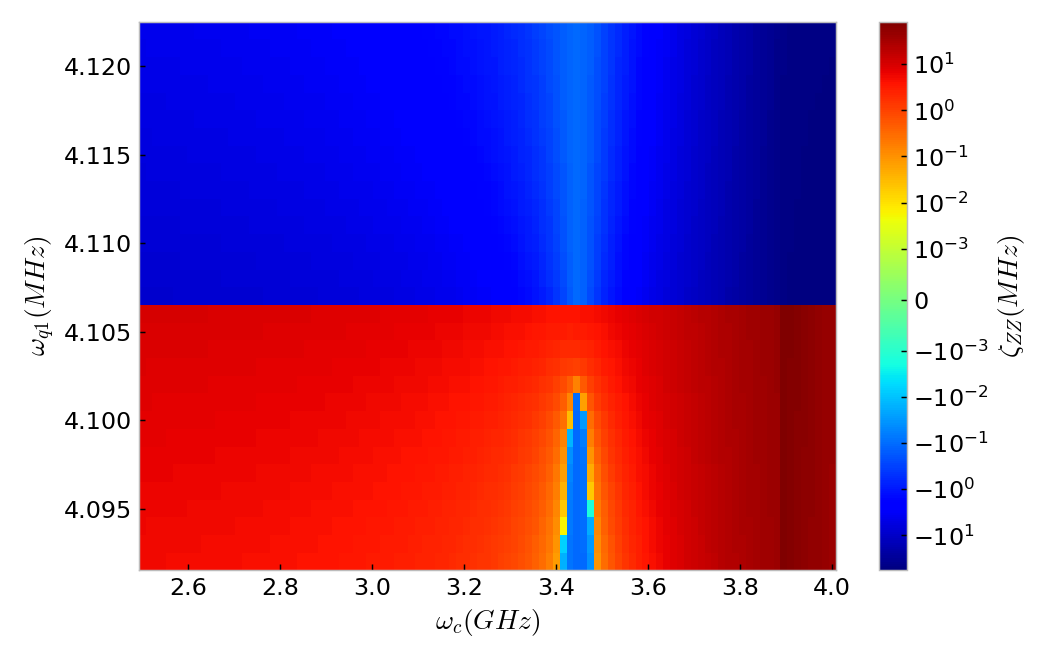

C:\Users\QC\AppData\Local\Temp\ipykernel_45512\1260509214.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(X, Y, zz_arr, norm=norm, cmap='jet')


In [45]:
X, Y = np.meshgrid(w_c_list, w1_list)
zz_arr = (np.array(zz_list_ori)*1e3).reshape(len(w1_list), len(w_c_list))

fig, ax = plt.subplots()
ax.set_xlabel(r'$\omega_{c} (GHz)$')
ax.set_ylabel(r'$\omega_{q1} (MHz)$')
norm = mpl.colors.SymLogNorm(linthresh=0.001)
c = ax.pcolormesh(X, Y, zz_arr, norm=norm, cmap='jet')
cb = plt.colorbar(c, ax=ax)
cb.set_label(r'$\zeta_{ZZ}(MHz)$')
# CS = ax.contour(X, Y, zz_arr, [0.03],norm=norm, colors='red')
# ax.clabel(CS, inline=True, fontsize=10)


fig.tight_layout()
title = fr'比特失谐对ZZ关断点的影响'
# ploter.save_fig(fig, title)

<IPython.core.display.Javascript object>


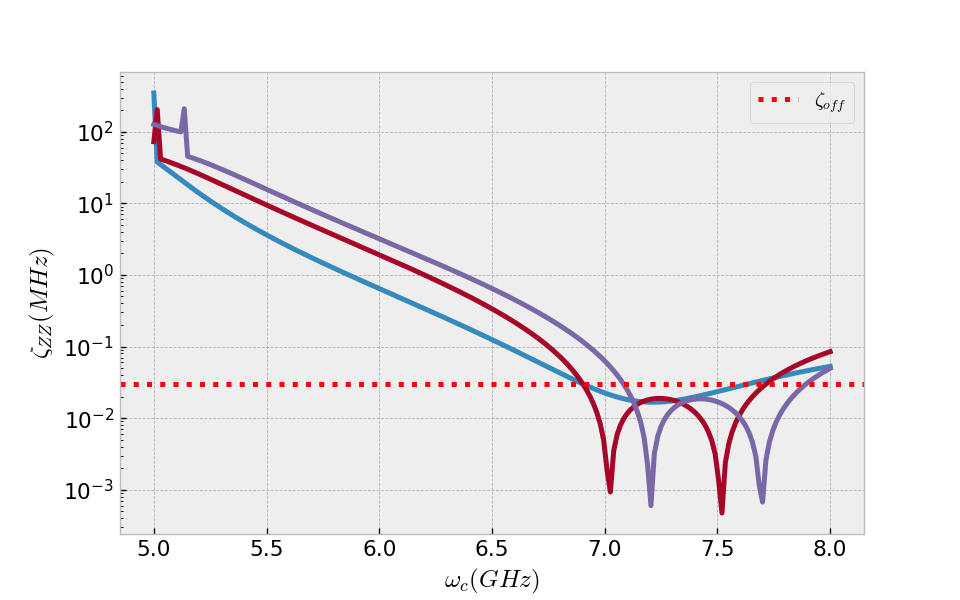

[347.5796  37.8302  34.8636  32.1142  29.573   27.2303  25.0752  23.0965
  21.2827  19.6219  18.1028  16.7141  15.4452  14.2857  13.2262  12.2577
  11.372   10.5614   9.8191   9.1387   8.5143   7.9409   7.4137   6.9284
   6.4812   6.0686   5.6875   5.3351   5.0087   4.7063   4.4256   4.1649
   3.9224   3.6966   3.4862   3.2899   3.1065   2.9351   2.7748   2.6246
   2.4838   2.3518   2.2278   2.1113   2.0017   1.8985   1.8014   1.7099
   1.6236   1.5421   1.4652   1.3925   1.3237   1.2587   1.1972   1.1389
   1.0837   1.0314   0.9818   0.9347   0.89     0.8476   0.8073   0.769
   0.7326   0.6979   0.665    0.6337   0.6038   0.5754   0.5484   0.5226
   0.498    0.4746   0.4523   0.4311   0.4108   0.3914   0.373    0.3554
   0.3386   0.3225   0.3072   0.2926   0.2787   0.2654   0.2527   0.2405
   0.2289   0.2179   0.2073   0.1972   0.1876   0.1784   0.1696   0.1613
   0.1533   0.1457   0.1384   0.1314   0.1248   0.1185   0.1125   0.1068
   0.1013   0.0961   0.0911   0.0864   0.0819   0.07

In [34]:
zz_off = 0.03
w1_list_sub = [4.6, 4.88, 5.12]
fig, ax = plt.subplots()
ax.set_xlabel(r'$\omega_{c} (GHz)$')
ax.set_ylabel(r'$\zeta_{ZZ}(MHz)$')
ax.set_yscale('log')
for w1 in w1_list_sub:
#     print(zz_arr[np.where(np.round(w1_list, decimals=2) == w1)[0][0],:])
    ax.plot(w_c_list,zz_arr[np.where(np.round(w1_list, decimals=2) == w1)[0][0],:], label=f'\')
    
ax.axhline(zz_off, linestyle=':', color='red', label='$\zeta_{off}$')    
ax.legend()

In [28]:
w_c_list.shape

(201,)

In [27]:
zz_arr[0,:].shape

(201,)

In [20]:
np.where(w1_list == 4.6)

(array([], dtype=int64),)

In [23]:
w1_list[20]==4.6

False

In [31]:
np.where(np.round(w1_list, decimals=2) == w1)[0]

(array([20]),)